Calculate comment word and character length

In [1]:
import pandas as pd

data = pd.read_csv("./../../data/train_set_0520.csv", usecols=['comment', 'non-information'])

columns = data.columns
print(columns)

data['comment'] = data['comment'].apply(str)
data['comment_len_characters'] = data.apply(lambda row: len(row['comment']), axis=1)
data['comment_len_words'] = data.apply(lambda row: len(row['comment'].split()), axis=1)

data.head()

Index(['comment', 'non-information'], dtype='object')


,comment,non-information,comment_len_characters,comment_len_words
0,@implNote taken from {@link com.sun.javafx.sce...,yes,141,5
1,icon.setToolTipText(printedViewModel.getLocali...,yes,56,1
2,Synchronize changes of the underlying date val...,no,79,10
3,Ask if the user really wants to close the give...,yes,56,11
4,css: information *,no,18,3


Comment character length distribution vs non-information 'no'

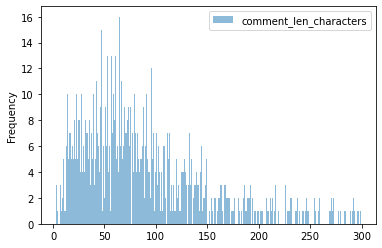

In [2]:
df1 = data[['non-information', 'comment_len_characters']]

good_comments = data[data['non-information'] == 'no']
comment_len_characters = good_comments[[ 'comment_len_characters']]
comment_len_characters = comment_len_characters[comment_len_characters[ 'comment_len_characters'] < 300]

ax = comment_len_characters.plot.hist(bins=300, alpha=0.5)

Comment average character length for non-information 'no' comments

In [3]:
good_comments['comment_len_characters'].mean()

112.29871520342613

Comment character length distribution vs non-information 'yes'

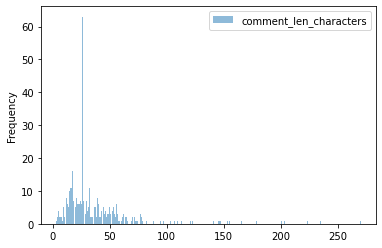

In [4]:
bad_comments = data[data['non-information'] == 'yes']
bad_comment_len_characters = bad_comments[[ 'comment_len_characters']]
bad_comment_len_characters = bad_comment_len_characters[bad_comment_len_characters[ 'comment_len_characters'] < 300]
ax2 = bad_comment_len_characters.plot.hist(bins=300, alpha=0.5)


Comment average character length for non-information 'no' comments

In [5]:
bad_comments['comment_len_characters'].mean()

42.254641909814325

Comment character length distribution vs non-information

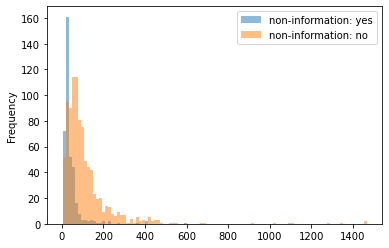

In [6]:
d = [bad_comments['comment_len_characters'], good_comments["comment_len_characters"]]
headers = ["non-information: yes", "non-information: no"]

df3 = pd.concat(d, axis=1, keys=headers)
df3.head()

ax2 = df3.plot.hist(bins=100, alpha=0.5)

Comment word length distribution vs non-information 'no'

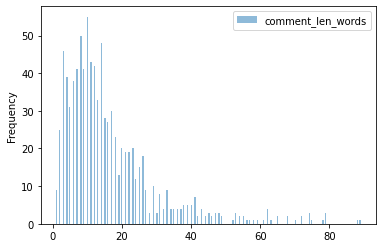

In [7]:
comment_len_words = good_comments[[ 'comment_len_words']]
# only take into accounts comments with word length less than 100
comment_len_words = comment_len_words[comment_len_words['comment_len_words'] < 100]
ax = comment_len_words.plot.hist(bins=240, alpha=0.5)

Average comment word length for non-information 'no'

In [8]:
good_comments['comment_len_words'].mean()

18.069593147751608

Comment word length distribution vs non-information 'yes'

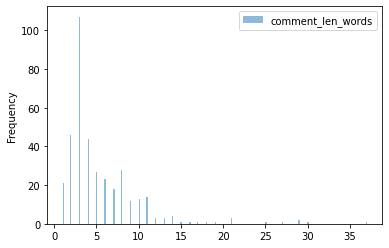

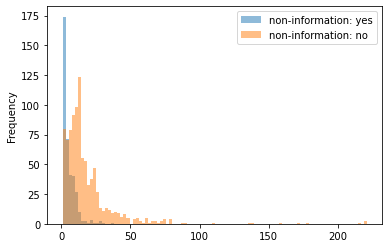

In [9]:
comment_len_words = bad_comments[[ 'comment_len_words']]
# only take into accounts comments with word length less than 100
comment_len_words = comment_len_words[comment_len_words['comment_len_words'] < 100]
ax = comment_len_words.plot.hist(bins=240, alpha=0.5)

d = [bad_comments['comment_len_words'], good_comments["comment_len_words"]]
headers = ["non-information: yes", "non-information: no"]

df3 = pd.concat(d, axis=1, keys=headers)
df3.head()

ax2 = df3.plot.hist(bins=100, alpha=0.5)

Average comment word length for non-information 'yes'

In [10]:
bad_comments['comment_len_words'].mean()

5.519893899204244

Median comment word length for non-information 'yes'

In [11]:
bad_comments['comment_len_words'].median()

4.0

Median comment word length for non-information 'no'

In [12]:
good_comments['comment_len_words'].median()

13.0